<a href="https://colab.research.google.com/github/elianekelm/IA_PUC_Minas/blob/master/Transforma%C3%A7%C3%A3oDeDados2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.linear_model import LinearRegression

np.set_printoptions(threshold=None, precision=2)
pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)
pd.set_option('precision', 2)

# **Base de dados Gazola de Imóveis em São Paulo**

A base possui 14 campos: um identificador, 11 atributos e 2 rótulos (Cub e Preço $)

**UPLOAD DE ARQUIVO LOCAL:**

Deve-se fazer o upload do arquivo "Gazola_dados_apartamento_resumo.xls" disponível na pasta "Datasets".

In [13]:
from google.colab import files

uploaded = files.upload()

Saving Gazola_dados_apartamento_resumo.xls to Gazola_dados_apartamento_resumo (1).xls


In [14]:
gazola = pd.read_excel(next(iter(uploaded.keys())), sheet_name=1)

print(f"Dimensões: {gazola.shape}")
print(f"\nCampos: {list(gazola.keys())}")
print(f"\nTipos dos dados: \n{gazola.dtypes}")
print("\n",gazola.describe(percentiles=[]))


Dimensões: (397, 14)

Campos: ['imóvel', 'DepEmp', 'Conserv', 'Classif', 'Elev', 'RegHom', 'Suíte', 'Garag', 'Dorm', 'Idade', 'Energia', 'Artot', 'Cub', 'Preço($)']

Tipos dos dados: 
imóvel        int64
DepEmp        int64
Conserv       int64
Classif       int64
Elev          int64
RegHom        int64
Suíte         int64
Garag         int64
Dorm          int64
Idade         int64
Energia       int64
Artot       float64
Cub         float64
Preço($)    float64
dtype: object

        imóvel  DepEmp  Conserv  Classif    Elev  RegHom   Suíte   Garag  \
count  397.00  397.00   397.00   397.00  397.00  397.00  397.00  397.00   
mean   199.00    1.39     3.01     1.93    1.83    5.54    1.61    1.99   
std    114.75    0.49     1.02     0.61    0.38    1.97    0.49    0.56   
min      1.00    1.00     1.00     1.00    1.00    1.00    1.00    1.00   
50%    199.00    1.00     3.00     2.00    2.00    6.00    2.00    2.00   
max    397.00    2.00     4.00     3.00    2.00   11.00    3.00    3.0

## **PREPARANDO A BASE PARA O TREINAMENTO**

É necessário remover o identificador, retirar o Cub e definir o preço como atributo alvo.

`train_test_split` irá separar a base em "base de treinamento" e "base de teste" a partir de uma amostragem aleatória.

Base de treinamento: (357, 11)
Base de teste: (40, 11)


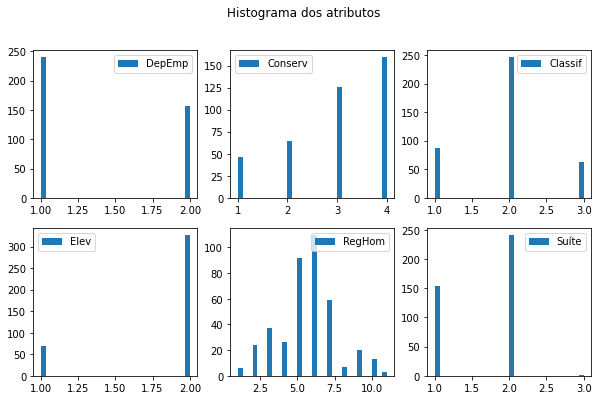

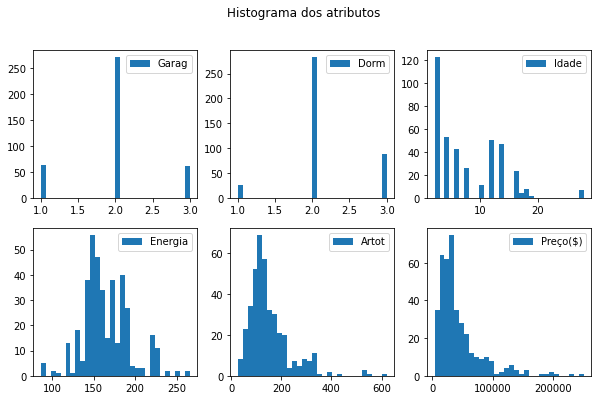

In [15]:
X = gazola.iloc[:, 1: (gazola.shape[1] - 2)]
y = gazola.iloc[:,(gazola.shape[1] - 1)]

# Recupera o nome dos atributos

atributos = list(gazola)[1:(gazola.shape[1] - 2)]
rotulo = list(gazola)[(gazola.shape[1] - 1)]

# Exibe o histograma dos atributos.

fig, ax = plt.subplots(2, 3, figsize=(10, 6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
  for j in range(3):
    ax[i, j].hist(X.iloc[:,(i*3 + j)], label=atributos[i*3+j], bins=30)
    ax[i, j].legend()

fig, ax = plt.subplots(2, 3, figsize=(10,6))
plt.suptitle("Histograma dos atributos")

for i in range(2):
  for j in range(3):
    if j == 2 and i == 1:
      ax[i, j].hist(y.iloc[:], label=rotulo, bins=30)
    else:
      ax[i, j].hist(X.iloc[:, (i*3 + j+6)], label=atributos[i*3 + j+6], bins=30)
    ax[i, j].legend()

# Amostragem de dados

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=0)

print(f"Base de treinamento: {X_train.shape}")
print(f"Base de teste: {X_test.shape}")


## **TREINAMENTO POR REGRESSÃO LINEAR**

fit( ) realiza o ajuste do modelo (treinamento).

predict( ) aplica o modelo sobre novos dados.

Acurácia da base de treinamento: 0.92
Acurácia da base de testes: 0.82

Descrição do modelo: 
w: ['DepEmp: 240.34', 'Conserv: 1895.61', 'Classif: 9117.99', 'Elev: -2617.38', 'RegHom: 2457.82', 'Suíte: -6619.12', 'Garag: -3094.77', 'Dorm: -1511.09', 'Idade: 80.60', 'Energia: -74.78', 'Artot: 390.57'] 
b: -15469.97
Número de atributos usados: 11

Erro percentual: 
Média: 0.25 
Máx: 0.87 
Mín: 0.00


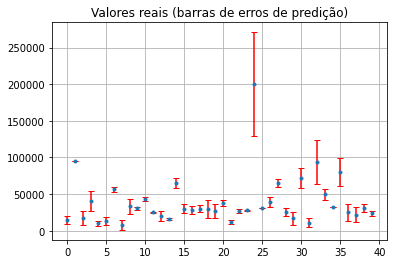

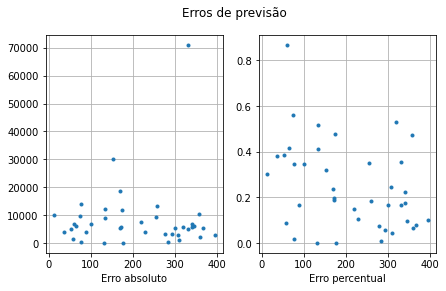

In [16]:
lnr = LinearRegression()

lnr.fit(X_train, y_train)

y_prev = lnr.predict(X_test)

print(f"Acurácia da base de treinamento: {lnr.score(X_train, y_train):.2f}")
print(f"Acurácia da base de testes: {lnr.score(X_test, y_test):.2f}")

print("\nDescrição do modelo: ")
s = ["{0}: {1:0.2f}".format(a,v) for a, v in zip(atributos, lnr.coef_)]
print(f"w: {s} \nb: {(lnr.intercept_):.2f}")
print(f"Número de atributos usados: {np.sum(lnr.coef_ != 0)}")

# Calcula o erro absoluto e o erro percentual da regressão linear
errolnr = np.abs(y_test - y_prev)
erroperc = errolnr / list(y_test)

print(f"\nErro percentual: \nMédia: {np.mean(erroperc):.2f} \nMáx: {np.max(erroperc):.2f} \nMín: {np.min(erroperc):.2f}")

plt.figure(figsize=(6,4))
plt.errorbar(np.arange(y_test.size), list(y_test), yerr=errolnr,
             fmt='.', ecolor='r', capsize=3)
plt.title("Valores reais (barras de erros de predição)")
plt.grid()

fig, ax = plt.subplots(1, 2, figsize=(7,4))
plt.suptitle("Erros de previsão")
ax[0].plot(errolnr, '.')
ax[0].set_xlabel("Erro absoluto")
ax[0].grid()
ax[1].plot(erroperc, '.')
ax[1].set_xlabel("Erro percentual")
ax[1].grid()


## **TRANSFORMAÇÃO DE DADOS NUMÉRICOS**

Vamos explorar a transformação de dados, para resolver problemas de distribuição e a normalização de dados.


------------- REGRESSÃO LINEAR NOMALIZADA ---------------
Acurácia da base de treinamento: 0.96
Acurácia da base de testes: 0.93
Descrição do modelo: 
 w:['DepEmp: 0.02', 'Conserv: 0.12', 'Classif: 0.14', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.07', 'Garag: 0.00', 'Dorm: 0.02', 'Idade: 0.02', 'Energia: -0.11', 'Artot: 1.41'] 
 b: 3.57

 ----------- COMPARAÇÃO DE PESOS ----------------
Original: 
w: ['DepEmp:240.34', 'Conserv:1895.61', 'Classif:9117.99', 'Elev:-2617.38', 'RegHom:2457.82', 'Suíte:-6619.12', 'Garag:-3094.77', 'Dorm:-1511.09', 'Idade:80.60', 'Energia:-74.78', 'Artot:390.57'] 
b: -15469.97
Normalizado: 
w: ['DepEmp: 0.02', 'Conserv: 0.12', 'Classif: 0.14', 'Elev: -0.00', 'RegHom: 0.23', 'Suíte: 0.07', 'Garag: 0.00', 'Dorm: 0.02', 'Idade: 0.02', 'Energia: -0.11', 'Artot: 1.41'] 
b: 3.57


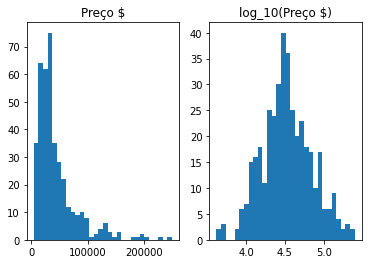

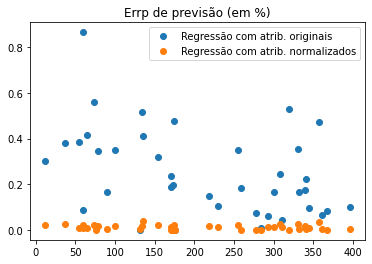

In [17]:
# Os atributos possuem faixas de valores diferentes, que influencia os pesos
# dos coeficientes da regressão. Vamos trabalhar melhor os atributos.

X_scale = X

# Iremos aplicar o logaritmo em "Energia Total", "Area Total" e "Preço $".

X_scale['Energia'] = np.log10(X['Energia'])
X_scale['Artot'] = np.log10(X['Artot'])
y_scale = np.log10(y)   # y --> é o target (preço)

# Normalização Min-Max dos dados.

min_max_scaler = preprocessing.MinMaxScaler()
min_max_scaler.fit(X_scale)
X_scale = min_max_scaler.transform(X_scale)

fig, ax = plt.subplots(1, 2, figsize=(6, 4))
ax[0].hist(y,bins=30, label='Preço S')
ax[0].set_title('Preço $')
ax[1].hist(y_scale, bins=30, label='log10(Preço $)')
ax[1].set_title('log_10(Preço $)')

X_train2, X_test2, y_train2, y_test2 = train_test_split(X_scale, y_scale, test_size=0.1, random_state=0)

lnr2 = LinearRegression().fit(X_train2, y_train2)

y_prev2 = lnr2.predict(X_test2)

errolnr2 = np.abs(y_test2 - y_prev2)
errolnr2perc = np.abs(y_test2 - y_prev2)/y_test2

plt.figure(figsize=(6,4))
plt.plot(erroperc, 'o', label='Regressão com atrib. originais')
plt.plot(errolnr2perc, 'o', label='Regressão com atrib. normalizados')
plt.title('Errp de previsão (em %)')
plt.legend()

print("\n------------- REGRESSÃO LINEAR NOMALIZADA ---------------")
print(f"Acurácia da base de treinamento: {lnr2.score(X_train2, y_train2):.2f}")
print(f"Acurácia da base de testes: {lnr2.score(X_test2, y_test2):.2f}")
s = ["{0}: {1:0.2f}".format(a,v) for a, v in zip(atributos, lnr2.coef_)]
print(f"Descrição do modelo: \n w:{s} \n b: {(lnr2.intercept_):.2f}")

print("\n ----------- COMPARAÇÃO DE PESOS ----------------")
s = ["{0}:{1:0.2f}".format(a,v) for a, v in zip(atributos, lnr.coef_)]
print(f"Original: \nw: {s} \nb: {(lnr.intercept_):.2f}")
s = ["{0}: {1:0.2f}".format(a, v) for a, v in zip(atributos, lnr2.coef_)]
print(f"Normalizado: \nw: {s} \nb: {(lnr2.intercept_):.2f}")